# Approximate integration using Gauss-Lagger method

In [68]:
import numpy as np

## Defining function to be integrated and degree

In [69]:
def f(x):
    return np.sin(x)

In [70]:
n = int(input('Enter number of approximation nodes: '))

Enter number of approximation nodes: 15


## Finding corresponding Lagger`s polynomial

In [71]:
def lagger(n): 
    if n == 0: 
        return np.array([1])
    if n == 1:
        return np.array([1, -1])
    L1 = lagger(n - 1)
    L2 = lagger(n - 2)
    L = np.zeros(n + 1)
    L[:n] += (2 * n - 1) * L1
    for i in range(L1.shape[0]):
        L[i + 1] -= L1[i]
    L[:-2] -= (n - 1) * L2
    return (1 / n) * L

In [72]:
def calculate(a, x):
    m = 1
    res = 0
    for i in range(a.shape[0]):
        res += a[i] * m
        m *= x
    return res

## Calculation nodes of approximation

In [73]:
xs = np.roots(lagger(n)[::-1])

## Defining helper function g(x) = e^x * f(x)

In [74]:
def g(x):
    return np.exp(x) * f(x)

## Applying Gauss formula

In [75]:
res = 0
polynom = lagger(n + 1)
for x in xs:
    w = x / ((n + 1) * calculate(polynom, x))**2
    res += w * g(x)
print(res)

2.4138783114218096


## Plotting results

In [76]:
import matplotlib.pyplot as plt

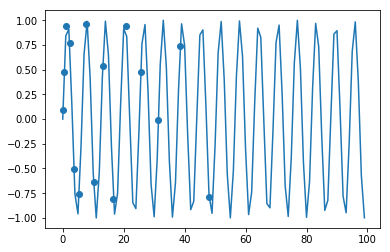

In [77]:
x = np.arange(100)
plt.plot(x, f(x), label='f(x)')
plt.scatter(xs, f(xs), label='f(nodes)')
plt.show()